#----------------------------------------------------
#            Projet de rattrapage Ma412
#----------------------------------------------------

#Samoyault Pierre SM1


In [1]:
# First we import our libraries, we must use sklearn for our classification problem.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#Load the two CSV as dataframe.
train_data = pd.read_csv('/content/drive/MyDrive/RATTRAPAGE_MA412/Ma412/Train_Test_data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/RATTRAPAGE_MA412/Ma412/Train_Test_data/test.csv')
train_head = train_data.head()
test_head = test_data.head()

test_head

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
train_head = train_data.head()
train_head

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#Short analysis of the content of the dataframes

#Train dataset

train_info = train_data.info()
train_nul= train_data.isnull().sum()
train_na= train_data.isna().sum()

train_na
#train_nul
#train_info
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

(103904, 25)

In [5]:
# Test dataset

test_info = test_data.info()
test_head = test_data.head()
test_na = test_data.isna().sum()
test_nul= test_data.isnull().sum()

#test_info
test_na
#test_nul
test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

(25976, 25)

In [6]:
'''
With this basic exploration, we have now a better view of the problem. It's a binary classification
We must use the random Forest classifier.
For that we need to fill the N/A value, and encode values that have an object type.

Moreover, we have identify some features that are not relevant for our problem.

The unamed column is not usefull as it's the index of the dataframe, then the id column is useless, as it
just an identifaction value. Finnaly the last one is the Customer type, to fidelise a customer, it's necessary
to satisfy him and it's the goal of the problem. It's the consequence of the satisfaction score so
it must biased on the other features.
'''


"\nWith this basic exploration, we have now a better view of the problem. It's a binary classification\nWe must use the random Forest classifier.\nFor that we need to fill the N/A value, and encode values that have an object type.\n\nMoreover, we have identify some features that are not relevant for our problem.\n\nThe unamed column is not usefull as it's the index of the dataframe, then the id column is useless, as it\njust an identifaction value. Finnaly the last one is the Customer type, to fidelise a customer, it's necessary\nto satisfy him and it's the goal of the problem. It's the consequence of the satisfaction score so\nit must biased on the other features.\n"

In [7]:
#Drop irrelevant features

train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

train_data = train_data.drop(columns=['Unnamed: 0'])
test_data = test_data.drop(columns=['Unnamed: 0'])

train_data = train_data.drop(columns=['Customer Type'])
test_data = test_data.drop(columns=['Customer Type'])

In [8]:
# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].mean())
test_data[numerical_cols] = test_data[numerical_cols].fillna(test_data[numerical_cols].mean())


# Encode categorical variables
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le


In [9]:
# Separate features and target

X_train = train_data.drop('satisfaction', axis=1)  # Replace 'target_column' with your actual target column name
y_train = train_data['satisfaction']  # Replace 'target_column' with your actual target column name
X_test = test_data.drop('satisfaction', axis=1)  # Ensure test data has the same structure, if applicable
y_test = test_data['satisfaction']  # Replace 'target_column' with your actual target column name

# Align test data with training data columns
X_test = X_test[X_train.columns]

In [23]:
# Use RFECV to select features with a simpler model

# Create a Random Forest classifier
rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=40, max_depth=6, random_state=42),step=2, cv=5, scoring='accuracy')

# Fit the RFECV model to the training data
rfecv.fit(X_train, y_train)

# Plot the number of features vs. cross-validation scores
print("Optimal number of caracteristiques: %d" % rfecv.n_features_)
print("Selected caracteristique: %s" % list(X_train.columns[rfecv.support_]))

Optimal number of caracteristiques: 21
Selected caracteristique: ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [11]:
# Get the ranking of the features
feature_rankings = rfecv.ranking_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': feature_rankings
}).sort_values(by='Ranking', ascending=True)

print(feature_importance_df)
selected_features = feature_importance_df[feature_importance_df['Ranking'] == 1]

                              Feature  Ranking
0                              Gender        1
18                        Cleanliness        1
17                   Inflight service        1
16                    Checkin service        1
15                   Baggage handling        1
14                   Leg room service        1
13                   On-board service        1
12             Inflight entertainment        1
11                       Seat comfort        1
19         Departure Delay in Minutes        1
10                    Online boarding        1
8                       Gate location        1
7              Ease of Online booking        1
6   Departure/Arrival time convenient        1
5               Inflight wifi service        1
4                     Flight Distance        1
3                               Class        1
2                      Type of Travel        1
1                                 Age        1
9                      Food and drink        1
20           

In [12]:
# Transform data according to selected characteristics
selected_features = X_train.columns[rfecv.support_]
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

In [18]:
# Define the parameter grid to be tested
param_grid = {
    'estimator__n_estimators': [50],
    'estimator__max_depth': [None,2,5],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2],

}

# Configure grid search with a simple split test train
grid_search = GridSearchCV(estimator=rfecv, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)

# Run a grid search on all the data
grid_search.fit(X_train_rfe, y_train)
best_params = grid_search.best_params_

# Best parameters found by grid search
print("Best parameters founds: ", best_params)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Meilleurs paramètres trouvés:  {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 50}


In [21]:
# Prédire et évaluer avec le meilleur modèle trouvé
best_rf = grid_search.best_estimator_
y_test_pred_rfe = best_rf.predict(X_test_rfe)

# Calculer les métriques de performance
print("Accuracy: ", accuracy_score(y_test, y_test_pred_rfe))
print(classification_report(y_test, y_test_pred_rfe))


Accuracy:  0.9588851247305205
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Matrice de confusion:
 [[14204   369]
 [  699 10704]]


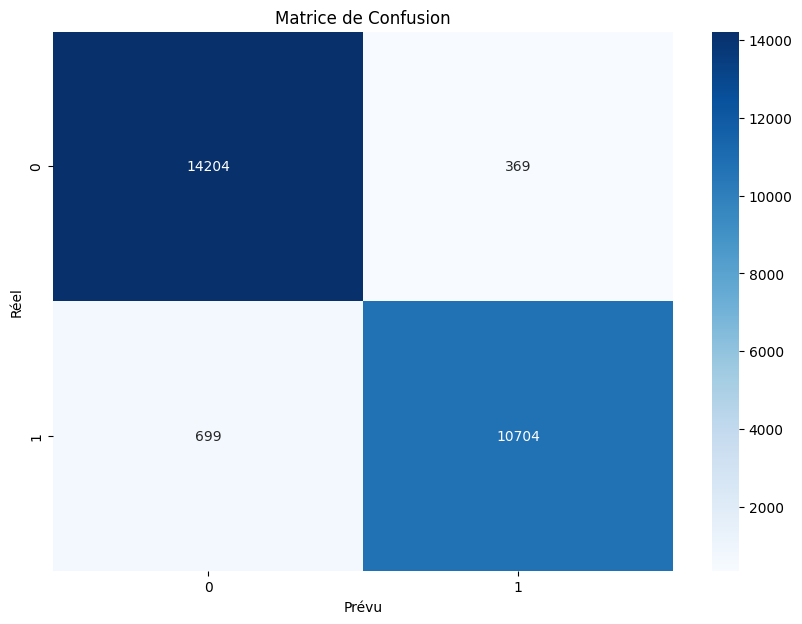

In [22]:
#Calculate the confusion matrix

target_encoder = LabelEncoder()
train_data['satisfaction'] = target_encoder.fit_transform(train_data['satisfaction'])
test_data['satisfaction'] = target_encoder.transform(test_data['satisfaction'])
conf_matrix = confusion_matrix(y_test, y_test_pred_rfe)
print("Matrice de confusion:\n", conf_matrix)

# Displey the matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Pred')
plt.ylabel('Real')
plt.title('Confusion matrix')
plt.show()